In [1]:
import pandas as pd
import numpy as np
import os
import pathlib
import matplotlib.pyplot as plt
import PIL
import cv2
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout, Flatten,Activation, BatchNormalization,MaxPooling2D
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator, img_to_array
from tensorflow.keras.callbacks import EarlyStopping
from keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam

from keras.utils import to_categorical

2023-10-19 09:20:36.023521: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-19 09:20:36.042597: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-19 09:20:36.042613: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-19 09:20:36.042623: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-19 09:20:36.046364: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-19 09:20:36.047158: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
data_dir = pathlib.Path('../data/')
print(data_dir)
list(data_dir.glob('*/*'))[:5]

../data


[PosixPath('../data/mango fruit/Image_26.jpg:Zone.Identifier'),
 PosixPath('../data/mango fruit/Image_25.jpg:Zone.Identifier'),
 PosixPath('../data/mango fruit/Image_15.jpg'),
 PosixPath('../data/mango fruit/Image_8.jpg'),
 PosixPath('../data/mango fruit/Image_7.jpg:Zone.Identifier')]

In [3]:
mango = list(data_dir.glob('mango fruit/*'))
mango[:5]

[PosixPath('../data/mango fruit/Image_26.jpg:Zone.Identifier'),
 PosixPath('../data/mango fruit/Image_25.jpg:Zone.Identifier'),
 PosixPath('../data/mango fruit/Image_15.jpg'),
 PosixPath('../data/mango fruit/Image_8.jpg'),
 PosixPath('../data/mango fruit/Image_7.jpg:Zone.Identifier')]

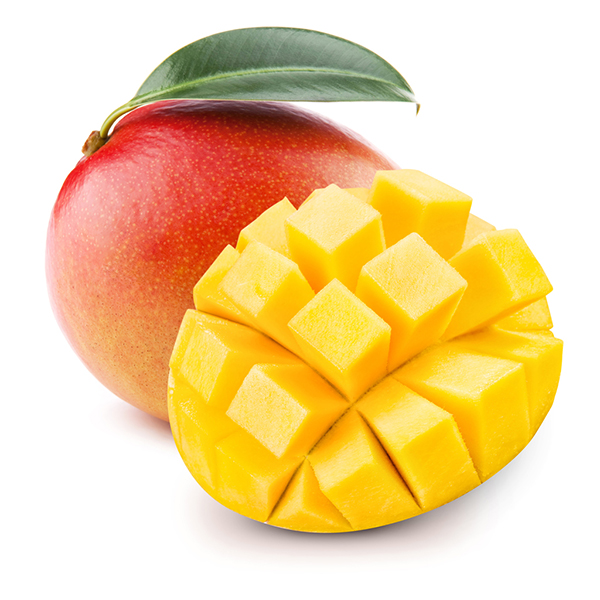

In [4]:
PIL.Image.open(str(mango[7]))

In [5]:
fruit_images_dict = {
    'apple': list(data_dir.glob('apple fruit/*')),
    'banana': list(data_dir.glob('banana fruit/*')),
    'cherry':list(data_dir.glob('cherry fruit/*')),
    'chickoo':list(data_dir.glob('chickoo fruit/*')),
    'grapes':list(data_dir.glob('grapes fruit/*')),
    'kiwi':list(data_dir.glob('kiwi fruit/*')),
    'mango':list(data_dir.glob('mango fruit/*')),
    'orange':list(data_dir.glob('orange fruit/*')),
    'strawberry':list(data_dir.glob('strawberry fruit/*'))
    }

fruit_labels_dict = {
    'apple': 0,
    'banana': 1,
    'cherry':2,
    'chickoo':3,
    'grapes':4,
    'kiwi':5,
    'mango':6,
    'orange':7,
    'strawberry':8 
   }

In [6]:
IMAGE_WIDTH=64
IMAGE_HEIGHT=64
IMAGE_CHANNELS = 3
X, Y = [], []

for fruit_name, images in fruit_images_dict.items():
    print(fruit_name)
    for image in images:
        img = cv2.imread(str(image))
        if isinstance(img,type(None)): 
#             print('image not found at' + str(image))
            continue
            
        elif ((img.shape[0] >= IMAGE_HEIGHT) and  (img.shape[1] >=IMAGE_WIDTH)):
            resized_img = cv2.resize(img,(IMAGE_WIDTH,IMAGE_HEIGHT))
            X.append(resized_img)
            Y.append(fruit_labels_dict[fruit_name])
        else:
#             print("Invalid Image at " + str(image))
            continue

X = np.array(X)
Y = np.array(Y)



Y = to_categorical(Y, num_classes=9)


apple


libpng warning: iCCP: known incorrect sRGB profile


banana
cherry
chickoo
grapes
kiwi
mango
orange
strawberry


In [7]:
predicted_classes = np.argmax(Y, axis=1)

In [8]:
predicted_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,

In [9]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=0.05)
print(len(X_train),len(Y_train))
print(len(X_test),len(Y_test))

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)
print(type(Y_train))

341 341
18 18
(341, 64, 64, 3) (341, 9)
(18, 64, 64, 3) (18, 9)
<class 'numpy.ndarray'>


In [10]:
# Data agumentation 
datagen = ImageDataGenerator(rotation_range=10,
            rescale = 1./255,
            width_shift_range=0.1,
            height_shift_range=0.1,
            horizontal_flip=True,
            vertical_flip=False,
            zoom_range=0.1,
            shear_range=0.1,
            brightness_range=[0.8, 1.2],
            fill_mode='nearest',
            validation_split=0.2  # set validation split to 20% 
            )

# Import the data into train and Validation subset
trainimagedata = datagen.flow_from_directory("../data",
                                              batch_size = 32,
                                              class_mode = 'categorical',
                                              target_size=(64,64),
                                              subset = 'training'
                                            )

testimagedata = datagen.flow_from_directory("../data",
                                              batch_size = 32,
                                              class_mode = 'categorical',
                                              target_size=(64,64),
                                              subset = 'validation'
                                            )

Found 288 images belonging to 9 classes.
Found 71 images belonging to 9 classes.


In [11]:
trainimagedata.classes
trainimagedata.class_indices

{'apple fruit': 0,
 'banana fruit': 1,
 'cherry fruit': 2,
 'chickoo fruit': 3,
 'grapes fruit': 4,
 'kiwi fruit': 5,
 'mango fruit': 6,
 'orange fruit': 7,
 'strawberry fruit': 8}

In [12]:
input_shape = trainimagedata.image_shape
input_shape

(64, 64, 3)

In [13]:
IMAGE_CHANNELS = 3

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(9, activation='softmax')
])


# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# model.summary()

2023-10-19 09:20:45.910067: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-19 09:20:45.910316: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [14]:
# Compile the model
optimizer = Adam(lr=0.001,beta_1=0.9,beta_2 = 0.999, epsilon=1e-8)

model.compile(optimizer = optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])


early_stop = EarlyStopping(monitor = 'val_loss', patience =15)

In [15]:
# Fitting the model
mdl_history = model.fit(trainimagedata,
                          validation_data = testimagedata,
                          epochs=35,
                          batch_size=16,
                          callbacks=[early_stop])

Epoch 1/35
9/9 [==============================] - 6s 655ms/step - loss: 2.2211 - accuracy: 0.1285 - val_loss: 2.1879 - val_accuracy: 0.1549
Epoch 2/35
9/9 [==============================] - 5s 615ms/step - loss: 2.1695 - accuracy: 0.1597 - val_loss: 2.0986 - val_accuracy: 0.2535
Epoch 3/35
9/9 [==============================] - 5s 560ms/step - loss: 2.0191 - accuracy: 0.2153 - val_loss: 1.8405 - val_accuracy: 0.2535
Epoch 4/35
9/9 [==============================] - 5s 554ms/step - loss: 1.9192 - accuracy: 0.2153 - val_loss: 1.6499 - val_accuracy: 0.2817
Epoch 5/35
9/9 [==============================] - 5s 580ms/step - loss: 1.7572 - accuracy: 0.2743 - val_loss: 1.5571 - val_accuracy: 0.4366
Epoch 6/35
9/9 [==============================] - 5s 583ms/step - loss: 1.6332 - accuracy: 0.3472 - val_loss: 1.4624 - val_accuracy: 0.3803
Epoch 7/35
9/9 [==============================] - 5s 594ms/step - loss: 1.5654 - accuracy: 0.4062 - val_loss: 1.4181 - val_accuracy: 0.4789
Epoch 8/35
9/9 [====

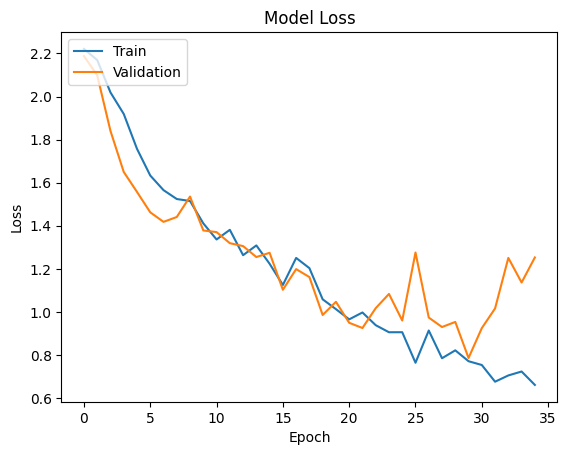

In [16]:
# Let's visualize training and testing loss
plt.plot(mdl_history.history['loss'])
plt.plot(mdl_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

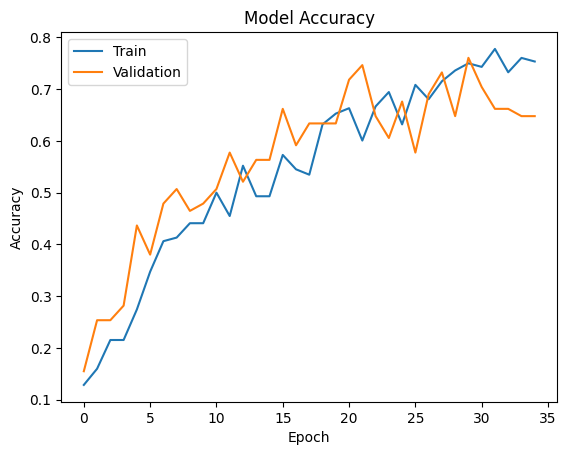

In [17]:
# Let's visualize training and testing accuracy by graph
plt.plot(mdl_history.history['accuracy'])
plt.plot(mdl_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [18]:
model.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 84ms/step - loss: 7993.6328 - accuracy: 0.0556


[7993.6328125, 0.0555555559694767]

In [19]:
trainimagedata.class_indices

{'apple fruit': 0,
 'banana fruit': 1,
 'cherry fruit': 2,
 'chickoo fruit': 3,
 'grapes fruit': 4,
 'kiwi fruit': 5,
 'mango fruit': 6,
 'orange fruit': 7,
 'strawberry fruit': 8}

In [21]:
from tensorflow.keras.preprocessing import image
new_image = image.load_img("../imagenes_prueba/descarga.jpg",target_size = (64,64))
image_array = image.img_to_array(new_image)
image_final = np.expand_dims(image_array ,axis=0)
image_final /= 255.
img_pred = model.predict(image_final)
sample_pred = np.argmax(img_pred)


# Mapear el número de clase a nombre de fruta
fruit_labels_dict = {
    0: 'apple',
    1: 'banana',
    2: 'cherry',
    3: 'chickoo',
    4: 'grapes',
    5: 'kiwi',
    6: 'mango',
    7: 'orange',
    8: 'strawberry'
}

predicted_fruit = fruit_labels_dict[sample_pred]

print("La fruta predicha es:", predicted_fruit)

1/1 [==============================] - 0s 12ms/step
La fruta predicha es: apple
